# SuperGlue

We use the **SuperGlue** algorithm to try to match image pairs. The keypoints are automatically computed.

In [1]:
import match_pairs as mp
import numpy as np
from PIL import Image
import torchvision.transforms as tfm
import matplotlib.pyplot as plt
import torch
import os
import random

In [2]:
img_folder = "./data/streets/data-2/street_view_images_raw"
output_folder = "./data/streets/results"

In [3]:
print(img_folder)
print(output_folder)

./data/streets/data-2/street_view_images_raw
./data/streets/results


### Test on a pair of images

Text(0.5, 1.0, 'Negative')

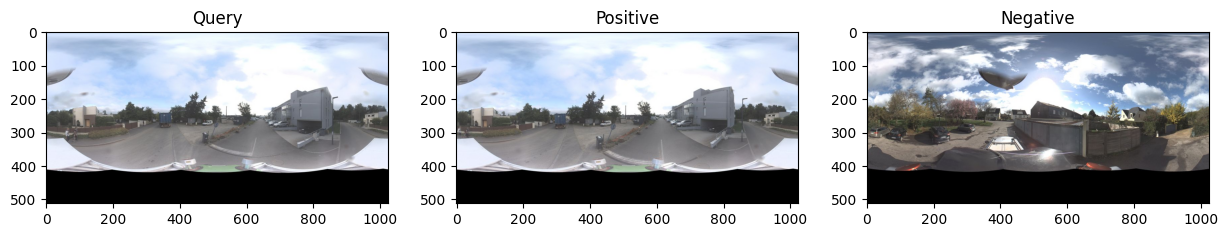

In [6]:
%matplotlib inline
query_name = "142250751549825.jpg"
positive_name = "146843414386160.jpg"
negative_name = "100130695962400.jpg"

query_img = Image.open(
    os.path.join(img_folder, "142250751549825.jpg")
)
positive_img = Image.open(
    os.path.join(img_folder, "146843414386160.jpg")
)
negative_img = Image.open(
    os.path.join(img_folder, "100130695962400.jpg")
)
_, axs = plt.subplots(ncols=3, figsize=(15, 5))
a = -1
a += 1
plt.sca(axs[a])
plt.imshow(query_img)
plt.title("Query")
a += 1
plt.sca(axs[a])
plt.imshow(positive_img)
plt.title("Positive")
a += 1
plt.sca(axs[a])
plt.imshow(negative_img)
plt.title("Negative")

In [7]:
os.system(f'python3 match_pairs.py --viz --superglue "outdoor" --input_pairs {output_folder}/test/test_pairs.txt --input_dir {img_folder}/ --output_dir {output_folder}/test/ --resize -1')

Namespace(input_pairs='./data/streets/results/test/test_pairs.txt', input_dir='./data/streets/data-2/street_view_images_raw/', output_dir='./data/streets/results/test/', max_length=-1, resize=[-1], resize_float=False, superglue='outdoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "data/streets/data-2/street_view_images_raw"
Will write matches to directory "data/streets/results/test"
Will write visualization images to directory "data/streets/results/test"
[Finished pair     0 of     2] load_image=0.042 matcher=4.954 viz_match=0.966 total=5.962 sec {0.2 FPS} 
[Finished pair     1 of     2] load_image=0.035 matcher=4.873 viz_match

0

In [8]:
res_filename = f'{query_name[:-4]}_{positive_name[:-4]}_matches'
output_1 = Image.open(
    os.path.join(f'{output_folder}/test', f'{res_filename}.png')
)
npz_1 = np.load(f'{output_folder}/test/{res_filename}.npz')

print(f"\n#### RESULTS COMPARISON {res_filename}:\n")
print(f'Number of keypoints: {len(npz_1["matches"]) - list(npz_1["matches"]).count(-1)}')
# print(f'Keypoints confidence: {npz_1["match_confidence"]}')



#### RESULTS COMPARISON 142250751549825_146843414386160_matches:

Number of keypoints: 518


In [9]:
npz_1['matches']

array([ -1,   1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   5,   6,   7,
        -1,  -1,  15,  -1,  10,  -1,  -1,  -1,  18,  -1,  -1,  19,  21,
        -1,  -1,  -1,  -1,  -1,  -1,  27,  23,  31,  25,  -1,  -1,  28,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  36,  -1,  -1,  -1,
        37,  46,  -1,  45,  47,  48,  52,  -1,  54,  -1,  49,  51,  -1,
        -1,  -1,  -1,  -1,  59,  -1,  62,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  65,  68,  69,  67,  70,  76,  -1,  -1,  -1,  -1,  79,
        77,  78,  -1,  81,  94,  83,  80,  88,  97,  -1,  95,  -1,  90,
        -1,  -1,  98,  92,  99, 101,  -1, 103,  -1, 104,  -1, 111,  -1,
       107, 112,  -1, 115, 117,  -1, 118, 116,  -1,  -1, 119,  -1,  -1,
       120, 124, 122,  -1, 132, 126,  -1, 129, 123, 125,  -1,  -1,  -1,
       139, 137,  -1, 134,  -1, 144, 140, 136, 142, 141, 147, 145, 146,
       151, 150,  -1, 152, 149,  -1, 156,  -1,  -1, 154, 167, 158, 160,
       165, 163, 170, 175,  -1,  -1,  -1, 176, 164,  -1, 162, 17

In [10]:
res_filename = f'{query_name[:-4]}_{negative_name[:-4]}_matches'
npz_2 = np.load(f'{output_folder}/test/{res_filename}.npz')
print(f"\n#### RESULTS COMPARISON {res_filename}:\n")
print(f'Number of keypoints: {len(npz_2["matches"]) - list(npz_2["matches"]).count(-1)}')


#### RESULTS COMPARISON 142250751549825_100130695962400_matches:

Number of keypoints: 20


## Test on a batch of pairs with one input image

In [11]:
query_name = "142250751549825.jpg"
positive_name = "146843414386160.jpg"
negative_name = "100130695962400.jpg"

# Specify the path to your folder containing images
folder_path = './data/streets/data-2/street_view_images_raw/'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

random_image_names = random.sample(all_files, 20)
random_image_names.append(positive_name)
random_image_names

['1658522487833120.jpg',
 '817658328844630.jpg',
 '988264291810746.jpg',
 '669968057676497.jpg',
 '1210346846037016.jpg',
 '911704319680200.jpg',
 '260199872520908.jpg',
 '942156129826489.jpg',
 '129408996317749.jpg',
 '1931643323838475.jpg',
 '631053801565066.jpg',
 '505543864278847.jpg',
 '519027803167490.jpg',
 '7125760634162358.jpg',
 '294318866119943.jpg',
 '1629208444114195.jpg',
 '375824304125886.jpg',
 '624669805443394.jpg',
 '1169159590498518.jpg',
 '481010766356028.jpg',
 '146843414386160.jpg']

In [100]:
for f in all_files:
    if '109955197809580' in f:
        print(f)


109955197809580.jpg


In [13]:
def create_folder(path):
    try:
        # Use makedirs to create the folder and its parent directories if they don't exist
        os.makedirs(path)
        print(f"Folder created at {path}")
    except FileExistsError:
        print(f"Folder already exists at {path}")


def create_text_file(file_path, input_name, subset_names):
    try:
        with open(file_path, 'w') as file:
            for sub in subset_names:
                file.write(f'{input_name} {sub}\n')
        print(f"{file_path} text file created at {file_path}")
    except IOError:
        print(f"Error creating the text file at {file_path}")

In [14]:
def find_nb_keypoints(data_dir, input_img_filename, subset_filenames, output_dir = './data/streets/data-2/results'):
    superglue_mode = 'outdoor'
    metrics = 'nb_keypoints'

    res_path = f'{output_dir}/matches_{input_img_filename[:-4]}'
    create_folder(res_path)
    pairs_path = f'{res_path}/pairs.txt'
    create_text_file(pairs_path, input_img_filename, subset_filenames)

    os.system(f'python3 match_pairs.py --viz --superglue {superglue_mode} --input_pairs {pairs_path} --input_dir {data_dir}/ --output_dir {res_path} --resize -1')

    dict_results = {}
    for img in subset_filenames:
        match_filename = f'{input_img_filename[:-4]}_{img[:-4]}_matches.npz'
        match_result_path = res_path + '/' + match_filename
        npz_res = np.load(match_result_path)
        if metrics=='nb_keypoints':
            dict_results[img] = len(npz_res["matches"]) - list(npz_res["matches"]).count(-1)

    return dict_results

In [15]:
nb_keypoints_dict = find_nb_keypoints('./data/streets/data-2/street_view_images_raw/', query_name, random_image_names, output_dir='./data/streets/results/batch_test') # results created automatically

Folder already exists at ./data/streets/results/batch_test/matches_142250751549825
./data/streets/results/batch_test/matches_142250751549825/pairs.txt text file created at ./data/streets/results/batch_test/matches_142250751549825/pairs.txt
Namespace(input_pairs='./data/streets/results/batch_test/matches_142250751549825/pairs.txt', input_dir='./data/streets/data-2/street_view_images_raw//', output_dir='./data/streets/results/batch_test/matches_142250751549825', max_length=-1, resize=[-1], resize_float=False, superglue='outdoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "data/streets/data-2/street_view_images_raw"
Will write mat

In [16]:
nb_keypoints_dict

{'1658522487833120.jpg': 89,
 '817658328844630.jpg': 4,
 '988264291810746.jpg': 14,
 '669968057676497.jpg': 40,
 '1210346846037016.jpg': 27,
 '911704319680200.jpg': 22,
 '260199872520908.jpg': 12,
 '942156129826489.jpg': 96,
 '129408996317749.jpg': 17,
 '1931643323838475.jpg': 8,
 '631053801565066.jpg': 123,
 '505543864278847.jpg': 48,
 '519027803167490.jpg': 31,
 '7125760634162358.jpg': 45,
 '294318866119943.jpg': 50,
 '1629208444114195.jpg': 9,
 '375824304125886.jpg': 27,
 '624669805443394.jpg': 106,
 '1169159590498518.jpg': 40,
 '481010766356028.jpg': 18,
 '146843414386160.jpg': 518}

In [17]:
def predict(dict_nb_keypoints, threshold = 300):
    # We could also think about the top k matches

    return {img_name: 1 if nb_keypoints>threshold else 0 for img_name, nb_keypoints in dict_nb_keypoints.items()}

In [18]:
def compute_score(input_img_name, predictions, gd_truth):
    nb_tests = len(predictions)
    assert nb_tests==0, "The predictions are empty, please re-run test"

    true_positive = []
    false_positive = []
    false_negative = []
    true_negative = []
    score = 0
    for img, pred in predictions.items():
        try:
            real_value = gd_truth[input_img_name]
            if(pred == real_value):
                score += 1
                if(pred==1):
                    true_positive.append(img)
                else:
                    true_negative.append(img)
            else:
                if(pred==1):
                    false_positive.append(img)
                else:
                    false_negative.append(img)
        except Exception as e:
            print(f'Error when trying to find {img} in gd_truth file')
            print(f'Error {e}')

    return score/nb_tests, true_positive, true_negative, false_negative, false_positive


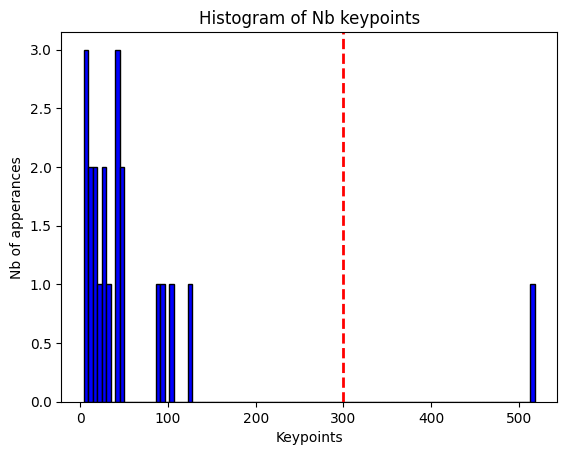

In [20]:
# Your list of values
kp = nb_keypoints_dict.values()

# Plotting the histogram
plt.hist(kp, bins=100, color='blue', edgecolor='black')

plt.axvline(x=300, color='red', linestyle='dashed', linewidth=2, label='Threshold')

# Adding labels and title
plt.xlabel('Keypoints')
plt.ylabel('Nb of apperances')
plt.title('Histogram of Nb keypoints')

# Display the plot
plt.show()

It seems that SuperGlue can recognize quite well f the places are come from the same zone, as the number of keypoints is quite high when it is a good fit. 
Moreover, we can change a some more parameters of the model:
```

        '--superglue', choices={'indoor', 'outdoor'}, default='indoor',
        '--max_keypoints', type=int, default=1024,
             ' (\'-1\' keeps all keypoints)'
        '--keypoint_threshold', type=float, default=0.005,
        '--nms_radius', type=int, default=4,
        ' (Must be positive)'
        '--match_threshold', type=float, default=0.2,
```


## Testing on whole dataset

### Build the Dataloader

In [21]:
# !pip install pandas
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os

/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/2865550291.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [106]:
# Visualize csv


test_neighbors_path = './data/streets/new_test_neighbors.csv'
test_strangers_path = './data/streets/new_test_strangers.csv'
test_neighbors_df = pd.read_csv(test_neighbors_path, sep=',')
test_strangers_df = pd.read_csv(test_strangers_path, sep=',')

print(test_neighbors_df.columns)
test_neighbors_df.head

Index(['point', 'neighbor'], dtype='object')


<bound method NDFrame.head of                    point          neighbor
0        107142764771426  1737748836585316
1        107142764771426  1119795058522924
2        107142764771426   191824289439782
3        107142764771426   307593481014820
4        107142764771426   376027820308620
...                  ...               ...
119390  5714977308519030   285544299960962
119391  5714977308519030   587957025750809
119392  5714977308519030   135384858791182
119393  5714977308519030   109402654778073
119394  5714977308519030  1057302055029299

[119395 rows x 2 columns]>

In [107]:
test_strangers_df.iloc[15]

point       107142764771426
stranger    947608892730506
Name: 15, dtype: int64

In [25]:
# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        # Load data from csv_file or any other source
        self.data = pd.read_csv(csv_file).to_numpy()  # Load your data here
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Implement loading of individual samples
        sample = self.data[idx]  # Load your sample here
        if self.transform:
            sample = self.transform(sample)
        return sample

# Define your transforms
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert PIL image to tensor
])

# Create custom datasets
test_dataset_neighbors = CustomDataset(csv_file='./data/streets/new_test_neighbors.csv', transform=transform)
test_dataset_strangers = CustomDataset(csv_file='./data/streets/new_test_strangers.csv', transform=transform)
# Define custom batch size
batch_size = 32

# Create dataloaders
test_loader_neighbors = DataLoader(test_dataset_neighbors, batch_size=batch_size, shuffle=False)
test_loader_strangers = DataLoader(test_dataset_strangers, batch_size=batch_size, shuffle=False)

In [23]:
test_neighbors_df.iloc[100][0]

/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/1199483244.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_neighbors_df.iloc[100][0]


133846468690252

In [ ]:
def match_keypoints_csv(data_dir, data_df, output_dir = f'./data/streets/results', debug = False):


    superglue_mode = 'outdoor'
    metrics = 'nb_keypoints'

    dict_results = {}
    data_length = len(data_df)
    nb_img_to_treat = 10
    treated_img = 0
    treated_lines = 0

    if debug:
        print(f'Find keypoints with mode {superglue_mode}, metrics {metrics}')
        print(f'Will treat the first {nb_img_to_treat} points or the full data of length {data_length}')

    # update subset fiename for each image and then perform comparison
    while treated_img <= nb_img_to_treat and treated_lines < data_length:
        

        current_img = str(data_df.iloc[treated_lines][0])
        subset_filenames = []

        while str(data_df.iloc[treated_lines][0]) == current_img and treated_lines < data_length:
            subset_filenames.append(str(data_df.iloc[treated_lines][1]))
            treated_lines += 1
        
        if(debug):
            print('___________________________________________')
            print(f'Comparison n{treated_img}: {current_img}')
            print(f'Found {len(subset_filenames)} img to compare')

        input_img_filename = current_img + '.jpg'
        subset_filenames = [f + '.jpg' for f in subset_filenames]

        if(debug):
            print('Creating folders...')
        res_path = f'{output_dir}/matches_{input_img_filename[:-4]}'
        create_folder(res_path)
        pairs_path = f'{res_path}/pairs.txt'
        create_text_file(pairs_path, input_img_filename, subset_filenames)

        if(debug):
            print('Running Superglue...')
            
        os.system(f'python3 match_pairs.py --viz --superglue {superglue_mode} --input_pairs {pairs_path} --input_dir {data_dir} --output_dir {res_path} --resize -1')

        list_results_current_img = []
        for img in subset_filenames:
            match_filename = f'{input_img_filename[:-4]}_{img[:-4]}_matches.npz'
            match_result_path = res_path + match_filename
            npz_res = np.load(match_result_path)
            if metrics=='nb_keypoints':
                list_results_current_img.append(len(npz_res["matches"]) - list(npz_res["matches"]).count(-1))

        dict_results[current_img] = list_results_current_img

        if(debug):
            print(f'Found mean nb of keypoints: {np.mean(list_results_current_img)}')
        
        treated_img +=1
    return dict_results

In [27]:
# Specify the path to your folder containing images
data_dir = './data/streets/data-2/street_view_images_raw/'

dict_results_test_neighbors_10 = match_keypoints_csv(data_dir, test_neighbors_df, output_dir = f'./data/streets/results/test_neighbors_10', debug = True)

Find keypoints with mode outdoor, metrics nb_keypoints
Will treat the first 10 points or the full data of length 109226
Comparing 107142764771426
Found 17 img to compare
Creating folders...
Folder created at ./data/streets/results/test_neighbors_10/matches_107142764771426/
./data/streets/results/test_neighbors_10/matches_107142764771426//pairs.txt text file created at ./data/streets/results/test_neighbors_10/matches_107142764771426//pairs.txt
Running Superglue...


/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/639008438.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_img = str(data_df.iloc[treated_lines][0])
/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/639008438.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while str(data_df.iloc[treated_lines][0]) == current_img and treated_lines < data_length:
/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/639008438.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

Namespace(input_pairs='./data/streets/results/test_neighbors_10/matches_107142764771426//pairs.txt', input_dir='./data/streets/data-2/street_view_images_raw/', output_dir='./data/streets/results/test_neighbors_10/matches_107142764771426/', max_length=-1, resize=[-1], resize_float=False, superglue='outdoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "data/streets/data-2/street_view_images_raw"
Will write matches to directory "data/streets/results/test_neighbors_10/matches_107142764771426"
Will write visualization images to directory "data/streets/results/test_neighbors_10/matches_107142764771426"
[Finished pair     0 of    17] l

In [38]:
dict_results_test_neighbors_10.values()

dict_values([[37, 9, 9, 215, 66, 18, 214, 6, 105, 7, 74, 3, 18, 116, 48, 36, 13], [43], [11, 11, 54, 1, 12, 19, 35, 15, 15, 135, 19, 5, 10, 4, 10, 10, 9], [205, 8, 35, 39, 51, 6, 23, 12, 13, 26, 5, 14, 18, 1], [48, 50, 49, 44, 75], [310, 403, 266, 210, 249, 253, 161, 348, 377, 515, 459, 478, 144, 137, 155, 119], [6, 36], [141, 90, 70, 82, 9, 21, 29, 33, 28, 3, 37, 7, 7, 19, 21, 27, 5], [119, 121, 100, 80, 111, 56, 56, 65], [146, 122, 34, 38, 18, 87, 61, 44], [65, 47, 112, 265, 100, 31, 20, 63, 268, 4, 64, 121, 5, 336, 42, 23, 293, 52, 22]])

In [9]:
def plot_results(dict_results, threshold=100):

    all_kps = []
    mean_matches = []
    max_kps = []
    for l in dict_results.values():
        all_kps+= l
        mean_matches.append(np.mean(l))
        max_kps.append(np.max(l))
    # Plotting the histogram
    fig, axes = plt.subplots(1, 3, figsize = (15, 5))
    axes = axes.flatten()
    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]

    ax1.hist(all_kps, bins=100, color='blue', edgecolor='black')
    ax1.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
    ax1.set_xlabel('Keypoints')
    ax1.set_ylabel('Nb of appearances')
    ax1.set_title('Nb keypoints')

    ax2.hist(mean_matches, bins=50, color='green', edgecolor='black')
    ax2.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
    ax2.set_xlabel('Mean Keypoints for an image throughout all comparisons')
    ax2.set_ylabel('Nb of apperances')
    ax2.set_title('Mean of keypoints')

    ax3.hist(max_kps, bins=50, color='green', edgecolor='black')
    ax3.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
    ax3.set_xlabel('Max Keypoints for an image throughout all comparisons')
    ax3.set_ylabel('Nb of apperances')
    ax3.set_title('Max key points')

    # Display the plot
    plt.show()

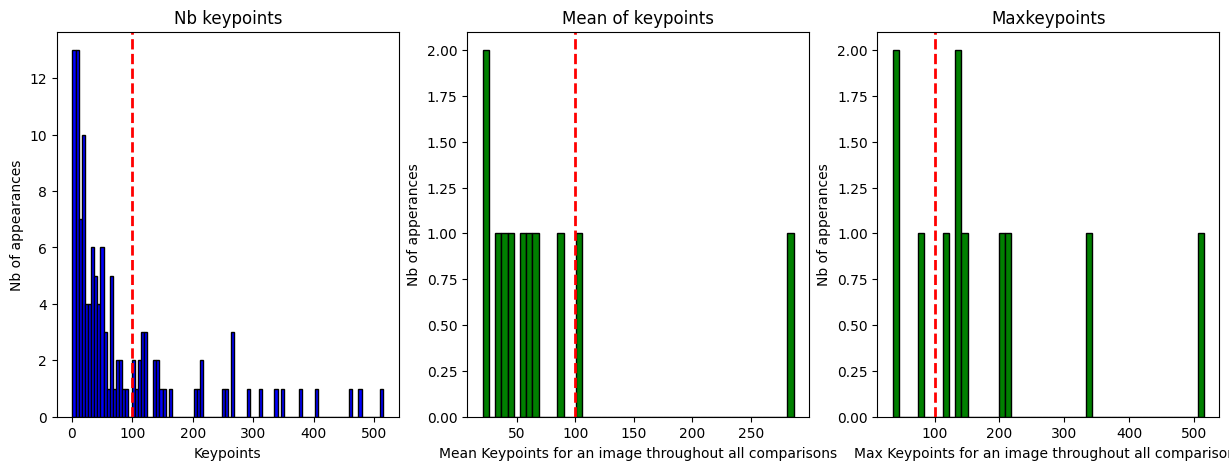

In [49]:
plot_results(dict_results_test_neighbors_10)

In [56]:
str(int(1876609885839681.0))

'1876609885839681'

In [108]:
dict_results_test_strangers_10 = match_keypoints_csv(data_dir, test_strangers_df, output_dir = f'./data/streets/results/test_strangers_10', debug = True)

Find keypoints with mode outdoor, metrics nb_keypoints
Will treat the first 10 points or the full data of length 217142
___________________________________________
Comparison n0: 107142764771426
Found 20 img to compare
Creating folders...
Folder already exists at ./data/streets/results/test_strangers_10/matches_107142764771426/
./data/streets/results/test_strangers_10/matches_107142764771426//pairs.txt text file created at ./data/streets/results/test_strangers_10/matches_107142764771426//pairs.txt
Running Superglue...


/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/4288986595.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_img = str(data_df.iloc[treated_lines][0])
/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/4288986595.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while str(data_df.iloc[treated_lines][0]) == current_img and treated_lines < data_length:
/var/folders/k5/qb09sqj16r594j7l3n7sz6jw0000gn/T/ipykernel_16635/4288986595.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

Namespace(input_pairs='./data/streets/results/test_strangers_10/matches_107142764771426//pairs.txt', input_dir='./data/streets/data-2/street_view_images_raw/', output_dir='./data/streets/results/test_strangers_10/matches_107142764771426/', max_length=-1, resize=[-1], resize_float=False, superglue='outdoor', max_keypoints=1024, keypoint_threshold=0.005, nms_radius=4, sinkhorn_iterations=20, match_threshold=0.2, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "data/streets/data-2/street_view_images_raw"
Will write matches to directory "data/streets/results/test_strangers_10/matches_107142764771426"
Will write visualization images to directory "data/streets/results/test_strangers_10/matches_107142764771426"
[Finished pair     0 of    20] l

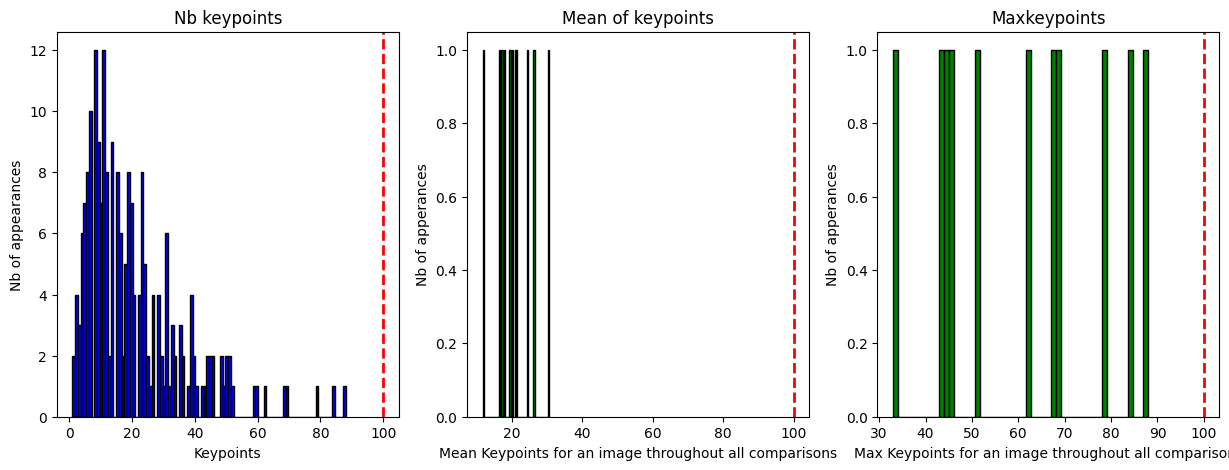

In [109]:
plot_results(dict_results_test_strangers_10)

Do a thorough experiment (run it on ssh)
How to classify whether it is the same place or not?
- We are very confident when there is one or two images with a high number of keypoints
- On the contrary, if there are some images with low number of keypoints in a set, we do not **always** have to give importance to it, it can be the same place but not viewed under the same angle

Take only into acount top-k matches, or compute a custom score (mean weighted by the nb of matches)

Ideas:
- Sum of nb of keypoints*probability (confidence)
- Non Linear activation function

In [17]:
# Retrieve the results from an npz file
import os
import numpy as np
import matplotlib.pyplot as plt

def results_from_npz(results_path):
    dict_results = {}
    for match_name in os.listdir(results_path):
        street_id = match_name.split('_')[-1]
        
        list_results_current_img = []
        for file in os.listdir(results_path+match_name):
            if file.endswith('.npz'):
                match_result_path = results_path+match_name+'/'+file
                npz_res = np.load(match_result_path)
                list_results_current_img.append(len(npz_res["matches"]) - list(npz_res["matches"]).count(-1))
        
        if len(list_results_current_img) > 0:
            dict_results[street_id] = list_results_current_img
    
    return dict_results

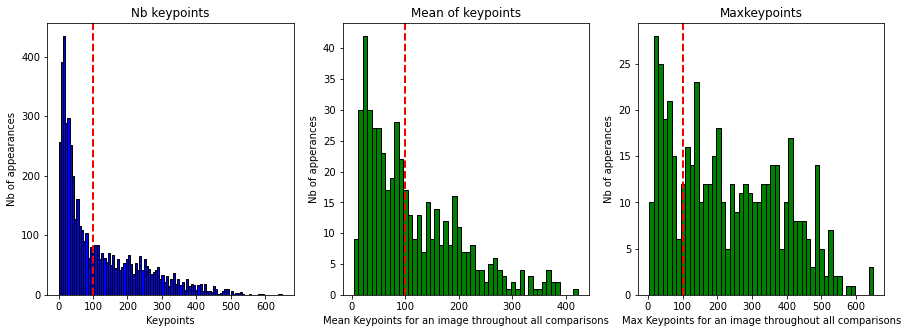

In [18]:
dict_results_test_neighbors_500 = results_from_npz(results_path = "./data/streets/results/test_neighbors_500/")       
len(dict_results_test_neighbors_500)
plot_results(dict_results_test_neighbors_500)

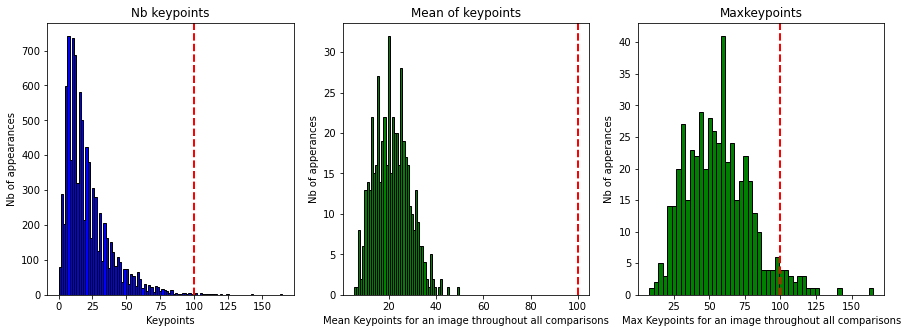

In [19]:
dict_results_test_strangers_500 = results_from_npz(results_path = "./data/streets/results/test_strangers_500/")       
len(dict_results_test_strangers_500)
plot_results(dict_results_test_strangers_500)

In [27]:
# Example of metrics we would have if we chose the max keypoints

def compute_scores(dict_results_neighbors, dict_results_strangers, threshold=100):
    max_kps_neighb = []
    for l in dict_results_neighbors.values():
        max_kps_neighb.append(np.max(l))
    
    max_kps_strangers = []
    for l in dict_results_strangers.values():
        max_kps_strangers.append(np.max(l))

    y_true = [1]*len(dict_results_neighbors) + [0]*len(dict_results_strangers)
    y_pred = []
    for val in max_kps_neighb:
        if val >= threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)

    for val in max_kps_strangers:
        if val < threshold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    
    return y_true, y_pred

In [28]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

y_true, y_pred = compute_scores(dict_results_test_neighbors_500, dict_results_test_strangers_500)
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f'Accuracy {accuracy}')
print(f'Recall {recall}')
print(f'F1-Score {f1}')

Accuracy 0.847542627883651
Recall 0.744
F1-Score 0.8303571428571429
